In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('hepatitis.data')
df.shape

(154, 20)

In [3]:
df.head()

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [4]:
cols = ['Class',
'AGE',
'SEX',
'STEROID',
'ANTIVIRALS',
'FATIGUE',
'MALAISE',
'ANOREXIA',
'LIVER BIG',
'LIVER FIRM',
'SPLEEN PALPABLE',
'SPIDERS',
'ASCITES',
'VARICES',
'BILIRUBIN',
'ALK PHOSPHATE',
'SGOT',
'ALBUMIN',
'PROTIME',
'HISTOLOGY',]


df.columns = cols
df.columns = df.columns.str.lower().str.replace(' ','_')

In [5]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [6]:
df = df.replace('?', 0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   class            154 non-null    int64 
 1   age              154 non-null    int64 
 2   sex              154 non-null    int64 
 3   steroid          154 non-null    object
 4   antivirals       154 non-null    int64 
 5   fatigue          154 non-null    object
 6   malaise          154 non-null    object
 7   anorexia         154 non-null    object
 8   liver_big        154 non-null    object
 9   liver_firm       154 non-null    object
 10  spleen_palpable  154 non-null    object
 11  spiders          154 non-null    object
 12  ascites          154 non-null    object
 13  varices          154 non-null    object
 14  bilirubin        154 non-null    object
 15  alk_phosphate    154 non-null    object
 16  sgot             154 non-null    object
 17  albumin          154 non-null    ob

In [8]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [9]:
cols = ['fatigue', 'malaise','anorexia', 'liver_big', 
        'liver_firm', 'spleen_palpable', 'spiders','ascites', 
        'varices', 'alk_phosphate', 'sgot','protime']

for col in cols:
    df[col] = df[col].astype(int)

In [10]:
cols = ['albumin', 'bilirubin']

for col in cols:
    df[col] = df[col].astype(float)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
class,154.0,1.792208,0.407051,1.0,2.000,2.0,2.00,2.0
age,154.0,41.272727,12.574106,7.0,32.000,39.0,50.00,78.0
sex,154.0,1.097403,0.297473,1.0,1.000,1.0,1.00,2.0
antivirals,154.0,1.844156,0.363891,1.0,2.000,2.0,2.00,2.0
fatigue,154.0,1.337662,0.488037,0.0,1.000,1.0,2.00,2.0
malaise,154.0,1.590909,0.506347,0.0,1.000,2.0,2.00,2.0
anorexia,154.0,1.779221,0.431546,0.0,2.000,2.0,2.00,2.0
liver_big,154.0,1.714286,0.579771,0.0,2.000,2.0,2.00,2.0
liver_firm,154.0,1.467532,0.627984,0.0,1.000,2.0,2.00,2.0
spleen_palpable,154.0,1.740260,0.508814,0.0,2.000,2.0,2.00,2.0


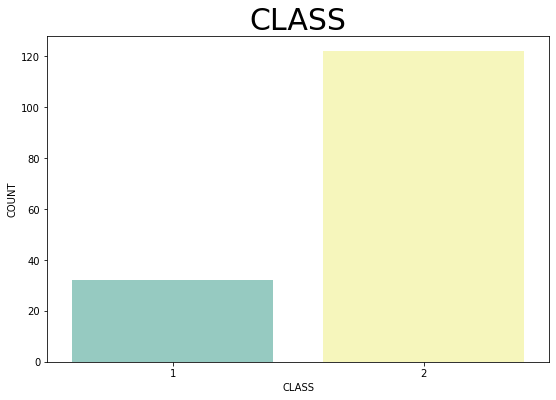

In [12]:
plt.figure(figsize=(9,6))
sns.countplot(df['class'], palette='Set3')
plt.title('CLASS', size=30)
plt.xlabel('CLASS')
plt.ylabel('COUNT')
plt.show()

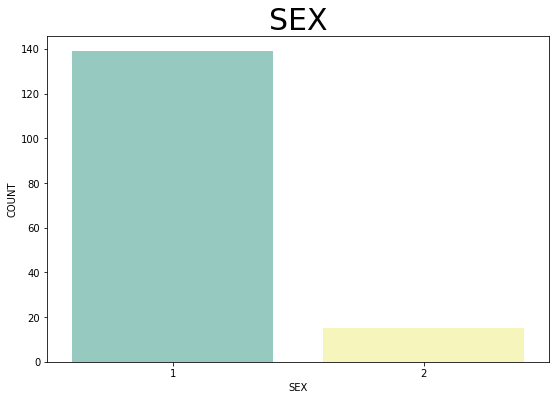

In [26]:
plt.figure(figsize=(9,6))
sns.countplot(df['sex'], palette='Set3')
plt.title('SEX', size=30)
plt.xlabel('SEX')
plt.ylabel('COUNT')
#plt.legend(labels)
plt.show()

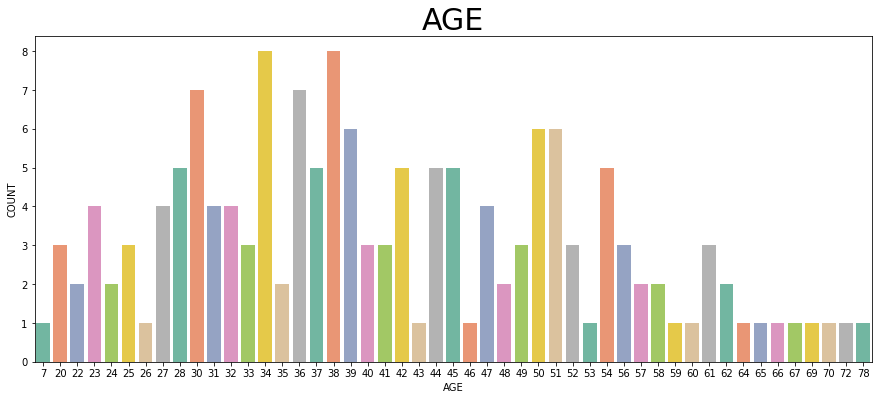

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(df['age'], palette='Set2')
plt.title('AGE', size=30)
plt.xlabel('AGE')
plt.ylabel('COUNT')
plt.show()

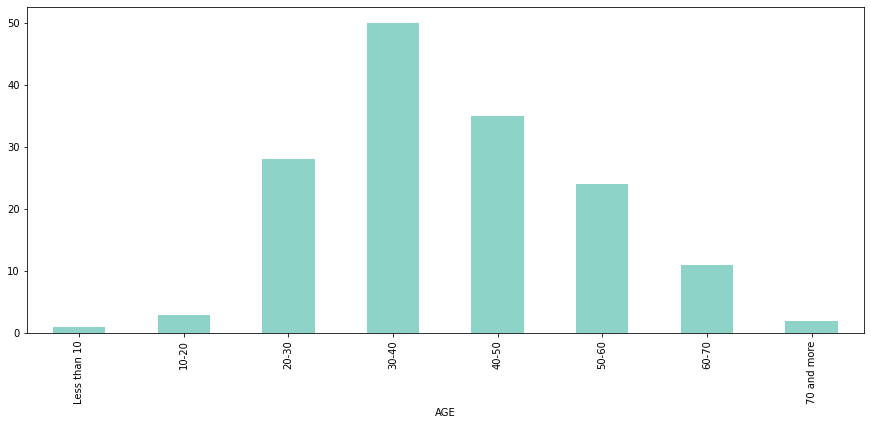

In [28]:
labels = ["Less than 10","10-20","20-30","30-40","40-50","50-60","60-70","70 and more"]
bins= [0,10,20,30,40,50,60,70,80]
freq_df = df.groupby(pd.cut(df['age'],bins=bins,labels=labels)).size()
freq_df.plot(kind='bar', figsize=(15,6), cmap='Set3')
plt.xlabel('AGE');

<AxesSubplot:xlabel='class', ylabel='age'>

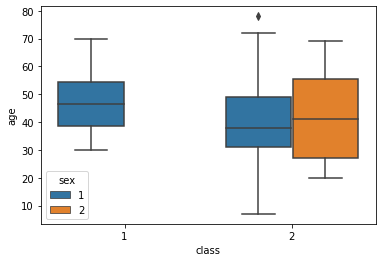

In [29]:
sns.boxplot(df['class'], df['age'], hue=df['sex'])

<AxesSubplot:xlabel='age'>

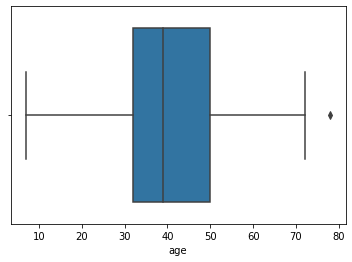

In [30]:
sns.boxplot(df['age'])

<AxesSubplot:xlabel='alk_phosphate'>

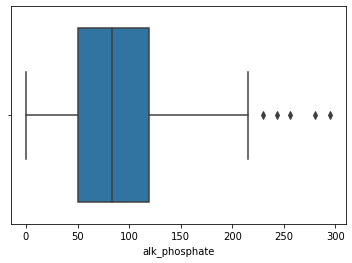

In [31]:
sns.boxplot(df['alk_phosphate'])

<AxesSubplot:xlabel='sgot'>

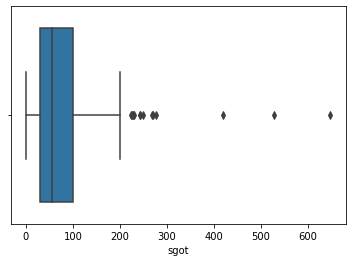

In [32]:
sns.boxplot(df['sgot'])

In [33]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

IQR = q3-q1
IQR

class               0.000
age                18.000
sex                 0.000
antivirals          0.000
fatigue             1.000
malaise             1.000
anorexia            0.000
liver_big           0.000
liver_firm          1.000
spleen_palpable     0.000
spiders             1.000
ascites             0.000
varices             0.000
bilirubin           0.800
alk_phosphate      69.250
sgot               68.500
albumin             1.175
protime            65.500
histology           1.000
dtype: float64

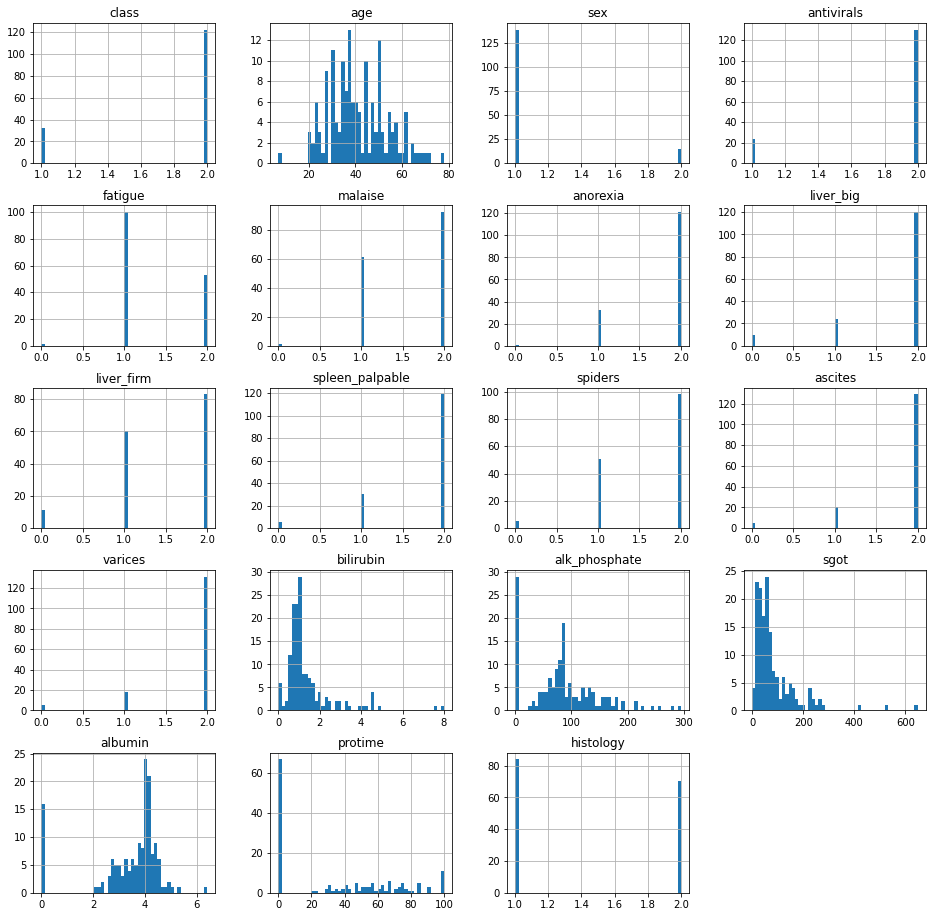

In [34]:
df.hist(bins=50, figsize=(16,16));

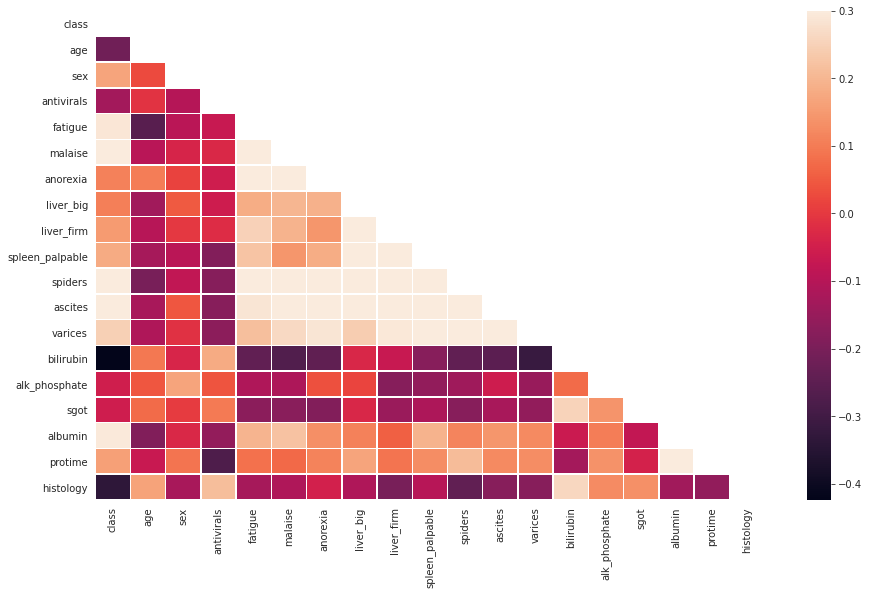

In [35]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15,9))
    ax = sns.heatmap(df.corr(), mask=mask, vmax=.3, linewidths=.5);

In [36]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [37]:
X = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]
y = df['class']

In [38]:
feature_selection = SelectKBest(score_func=chi2, k = 10)
feature_selection.fit(X, y)
feature_selection = pd.DataFrame({'Columns': X.columns, 'Score': feature_selection.scores_})
feature_selection.sort_values('Score', ascending=False)

,Columns,Score
17,protime,135.171210
15,sgot,43.252758
13,bilirubin,29.956782
0,age,27.710090
14,alk_phosphate,17.888751
16,albumin,6.824935
10,spiders,3.154178
18,histology,2.964107
5,malaise,2.434631
4,fatigue,2.286348


In [39]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

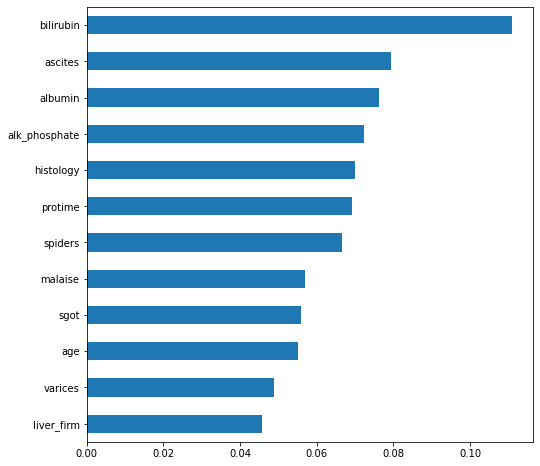

In [40]:
etc = ExtraTreesClassifier()
etc.fit(X, y)
feature_selection = pd.Series(index = X.columns, data = etc.feature_importances_)
feature_selection.nlargest(12).sort_values().plot(kind='barh', figsize=(8,8));

In [41]:
X = df[['age', 'sex', 'steroid', 'antivirals','fatigue','spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]

y = df['class']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((123, 14), (31, 14), (123,), (31,))

In [43]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.8455284552845529, 0.6129032258064516)

In [44]:
knn_pred = knn.predict(X_test)
print(confusion_matrix(y_test, knn_pred))
print('-' * 100)
print(classification_report(y_test, knn_pred))

[[ 1  9]
 [ 3 18]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.25      0.10      0.14        10
           2       0.67      0.86      0.75        21

    accuracy                           0.61        31
   macro avg       0.46      0.48      0.45        31
weighted avg       0.53      0.61      0.55        31



In [45]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_train, y_train), log_reg.score(X_test, y_test)

(0.8780487804878049, 0.7096774193548387)

In [46]:
log_reg_pred = log_reg.predict(X_test)
print(confusion_matrix(y_test, log_reg_pred))
print('-' * 100)
print(classification_report(y_test, log_reg_pred))

[[ 4  6]
 [ 3 18]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.57      0.40      0.47        10
           2       0.75      0.86      0.80        21

    accuracy                           0.71        31
   macro avg       0.66      0.63      0.64        31
weighted avg       0.69      0.71      0.69        31



In [47]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train), rfc.score(X_test, y_test)

(1.0, 0.7096774193548387)

In [48]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print('-' * 100)
print(classification_report(y_test, rfc_pred))

[[ 2  8]
 [ 1 20]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.67      0.20      0.31        10
           2       0.71      0.95      0.82        21

    accuracy                           0.71        31
   macro avg       0.69      0.58      0.56        31
weighted avg       0.70      0.71      0.65        31



In [117]:
df.to_csv('hepatitis.csv', index=False)

In [118]:
import pickle
pickle.dump(rfc, open('model.pkl','wb'))